# Regression Trees & Random Forest Regression

## Libraries and settings

In [2]:
# Libraries
import os
import numpy as np
import pandas as pd
import sklearn
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/Users/natalievintonjak/Documents/GitHub/ZHAW-Data-Science-Fundamentals/Week9


## Import the apartment data

In [4]:
# Define columns for import
columns = [ 'web-scraper-order',
            'address_raw',
            'rooms',
            'area',
            'luxurious',
            'price',
            'price_per_m2',
            'lat',
            'lon',
            'bfs_number',
            'bfs_name',
            'pop',
            'pop_dens',
            'frg_pct',
            'emp',
            'tax_income',
            'dist_supermarket']

# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv", sep=";", encoding='utf-8')[columns]

# Rename variable 'web-scraper-order' to 'id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'id'})

# Remove missing values
#    Drops rows with missing values (NaNs) across all columns.
#    Displays the first five rows of the resulting DataFrame.
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
df = df.loc[(df['price'] >= 1000) & 
            (df['price'] <= 5000)]

print(df.shape)
df.head(5)

(804, 17)


,id,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,tax_income,dist_supermarket
0,1662023695-433,"Sunnenbergstrasse 15, 8633 Wolfhausen, ZH",3.5,122,1,3180,26.07,47.255714,8.804976,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,317.117916
1,1662023720-634,"Blumenbergstrasse 7, 8633 Wolfhausen, ZH",4.0,87,0,1690,19.43,47.254879,8.793746,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,612.612674
2,1662023745-834,"8608 Bubikon, ZH",3.5,92,0,2350,25.54,47.277386,8.800306,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,2269.090923
3,1662023701-503,"8608 Bubikon, ZH",3.5,130,0,2500,19.23,47.277386,8.800306,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,2269.090923
4,1662023745-820,"Lavaterstr. 63, 8002 Zürich, ZH",2.5,78,0,3760,48.21,47.361378,8.533339,261,Zürich,420217,4778.994655,32.458468,491193.0,82932.73770,349.937421


## Regression Tree
See also: https://data36.com/regression-tree-python-scikit-learn

### Create train and test samples (train = 80%, test = 20% of the data)

In [5]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df[['area', 
                                                        'rooms',
                                                        'pop_dens',
                                                        'tax_income',
                                                        'dist_supermarket']], 
                                                        df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
     area  rooms     pop_dens   tax_income  dist_supermarket
362    75    3.5  1662.597326  70118.99692        595.010106
369    90    3.5  1662.597326  70118.99692        157.537439
496   100    3.5  1327.635328  80595.52826        147.967057
349    94    3.5  1662.597326  70118.99692         52.959836
308    94    3.5  1662.597326  70118.99692         65.909235 

y_train:
362    1840
369    1570
496    1941
349    2480
308    2800
Name: price, dtype: int64


### Fit the regression tree model

In [7]:
# Create decision tree regressor object
reg = DecisionTreeRegressor(random_state=20, 
                            max_depth=3)

# Train decision tree regressor
# Trains the Decision Tree Regressor (reg) using the training dataset (X_train and y_train).
reg = reg.fit(X_train, y_train)

# Predict the response for test dataset
#Uses the trained regressor (reg) to predict the response variable for the test dataset (X_test) and stores the predictions in y_pred.
y_pred = reg.predict(X_test)

### Calculate coefficient of determination (R-squared)

In [ ]:
# Calculate Coefficient of determination
#r2_score is a function from Scikit-Learn's metrics module used to compute the coefficient of determination 
#(R-squared) between the predicted values (y_pred) and the true target values (y_test).
r2_score(y_test, y_pred).round(4)

### Cross validation

In [9]:
# Cross-validation (5-fold)
cv = cross_val_score(reg, 
                     X_test, 
                     y_test, 
                     cv=5, 
                     scoring='r2')

# Result
print(list(cv.round(4)), end=" ")

[0.2815, 0.5374, 0.0209, 0.3816, 0.2405] 

### Print text representation of the regression tree

In [10]:
# Text representation of the regression tree
text_representation = tree.export_text(reg, 
                                       feature_names=list(X_train.columns),
                                       max_depth=2)

# Print text_representation
print(text_representation)

|--- area <= 93.50
|   |--- pop_dens <= 4269.10
|   |   |--- area <= 69.50
|   |   |   |--- value: [1567.00]
|   |   |--- area >  69.50
|   |   |   |--- value: [1951.30]
|   |--- pop_dens >  4269.10
|   |   |--- area <= 68.50
|   |   |   |--- value: [2190.78]
|   |   |--- area >  68.50
|   |   |   |--- value: [3047.45]
|--- area >  93.50
|   |--- pop_dens <= 3052.31
|   |   |--- area <= 120.50
|   |   |   |--- value: [2281.06]
|   |   |--- area >  120.50
|   |   |   |--- value: [3022.04]
|   |--- pop_dens >  3052.31
|   |   |--- rooms <= 2.00
|   |   |   |--- value: [2373.33]
|   |   |--- rooms >  2.00
|   |   |   |--- value: [3511.49]



### Vizualizing the regression tree

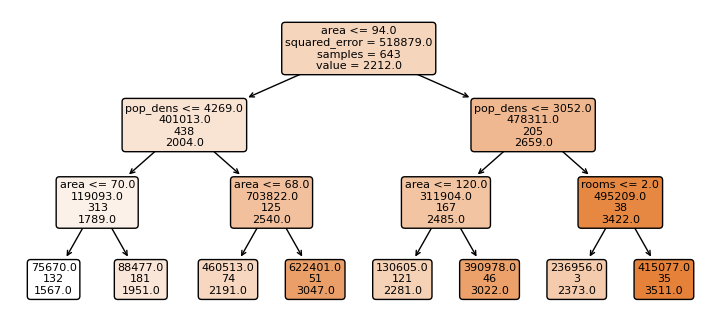

In [14]:
# For the meaning of numbers in each box, look at the root node
fig = plt.figure(figsize=(9,4))

tree_plot = tree.plot_tree(reg, 
                   feature_names=list(X_train.columns),  
                   class_names=['price'], #: Indicates the class name for the target variable, which in this case is 'price' for regression.
                   filled=True,
                   fontsize=8,
                   rounded=True,
                   label='root',
                   precision=0)

## Random Forest Regression
For details see: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

### Fit the Random Forest Regression

In [18]:
#    make_regression generates a synthetic dataset for regression.
# n_features=4 specifies the number of features in the dataset.
# n_informative=2 indicates the number of informative features among the total features.
# random_state=5 and shuffle=False are parameters controlling the randomness and shuffling of the dataset.

X, y = make_regression(n_features=4, n_informative=2,
                       random_state=5, shuffle=False)


reg_rf = RandomForestRegressor(n_estimators=500, 
                               max_depth=10, 
                               random_state=42)
reg_rf.fit(X_train, y_train)

# Calculate coefficient of determination (R-squared)
reg_rf.score(X_test, y_test).round(4)

0.5906

### Show feature importance

Index(['area', 'pop_dens', 'dist_supermarket', 'rooms', 'tax_income'], dtype='object')
[0.49757986 0.25275598 0.14593682 0.07073046 0.03299689]


<Axes: ylabel='features'>

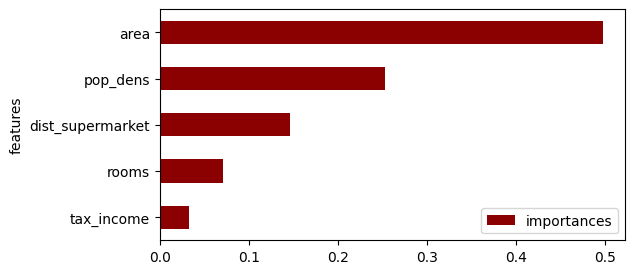

In [19]:
cols = X_train.columns

# Derive feature importance from random forest
importances = reg_rf.feature_importances_
std         = np.std([tree.feature_importances_ for tree in reg_rf.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='darkred', 
           figsize=(6,3))

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [20]:
import os
import platform
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 23.1.0
Datetime: 2023-11-15 17:00:00
Python Version: 3.9.6
-----------------------------------
